In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: decompress a zip named text_diff_inpaint_ocr.zip
# !unzip drive/MyDrive/text_diff_inpaint_ocr.zip --quiet
# %cd text_diff_inpaint_ocr

In [ ]:
!git clone https://github.com/PedroOrtix/ID_Inpainter.git

In [11]:
!pip install -r requirements.txt -q
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [1]:
%cd ID_Inpainter

/content/text_diff_inpaint_ocr


In [2]:
import easyocr
import numpy as np
import ocr
import PIL.Image as Image

#open a file containing the image
img = Image.open('images/imagen_dni.jpg')
img_array = np.array(img)

In [3]:
# hacemos ocr de la imagen array
reader = easyocr.Reader(['es'])
bounds = reader.readtext(img_array)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
for i in range(len(bounds)):
    print(bounds[i][1])

ES;
REINO DE ESPAÑA
DOCUMENTO NACIONALDE IDENTIDAD
99999999R
DNI
99999999R
Liloos
ESPAÑOLA
ESPANOLA
CARMEN
S0o
40o4uioie
M(lo
ESP
01 01 1980
iioy
Yauouz
02 06 2021
02 06 2031
Auy scpcati
020631
CaaoooOOO
hnL
987654
Documinionacional De Iolntioad / National IDeniy CaR
ESPECIMEN


In [11]:
#plot the image with the bounding boxes
# img = ocr.draw_boxes(img, result)
palabra = "02 06 2021"
img_resized, coordenadas_originales = ocr.recortar_imagen(bounds, palabra, img_array, nueva_dimension=512)
img_pil = Image.fromarray(img_resized)

# hacemos ocr de la imagen array ya recortada y redimensionada
bounds_resized = reader.readtext(np.array(img_pil))

In [10]:
from run import simple_inpaint

# reemplazamos la palabra en la imagen
replace = ["03 11 2002"]
right_bounds = [bound for bound in bounds_resized if bound[1] == palabra]

# hacer inpaint en la imagen
# imagen modificada y coordenadas de la palabra reemplazada
modified_images, composed_prompt = simple_inpaint(img_pil, right_bounds, replace)


[[[184, 302, 328, 302, 328, 330, 184, 330], '03 11 2002']]
[[[184, 302, 328, 302, 328, 330, 184, 330], '03 11 2002']]
Tokenizer: Added 2175 tokens
[info] Prompt:  | Keywords:  | Radio: 8 | Steps: 25 | Guidance: 2.5 | Natural: False
Global Stack: [[[184, 302, 328, 302, 328, 330, 184, 330], '03 11 2002']]
prompt   <|endoftext|><|startoftext|> l46 t75 r82 b82 [0] [3] [ ] [1] [1] [ ] [2] [0] [0] [2] <|endoftext|>
Composed Prompt: <|startoftext|><|endoftext|><|startoftext|> l46 t75 r82 b82 [0] [3] [ ] [1] [1] [ ] [2] [0] [0] [2] <|endoftext|><|endoftext|>
masked_feature.shape torch.Size([4, 4, 64, 64])


100%|██████████| 25/25 [00:13<00:00,  1.86it/s]


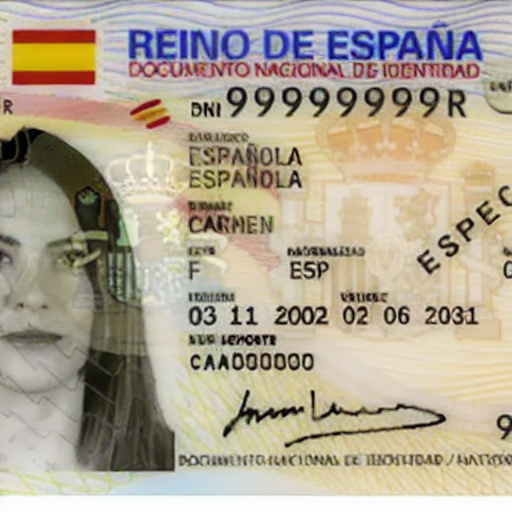

In [12]:
# Mostrar los 4 resultados en una cuadrícula
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(modified_images[i])
    ax.axis('off')
    ax.set_title(f"Resultado {i+1}")

In [12]:
from PIL import Image
from ocr import comparar_imagenes
# Ejemplo de uso
coodinates = [184, 302, 328, 302, 328, 330, 184, 330]
comparar_imagenes("images/modified_image.jpg", "images/imagen_dni_recortada.jpg", coodinates)


In [6]:
from PIL import Image
from ocr import reemplazar_parte_imagen

# Ejemplo de uso
coodinates = [184, 302, 328, 302, 328, 330, 184, 330]
img_recortada_mod = reemplazar_parte_imagen("imagen_dni_recortada.jpg", "modified_image.jpg", coodinates, "resultado.jpg")


In [12]:
x_min, y_min, x_max, y_max = coordenadas_originales
img_array[y_min:y_max, x_min:x_max] = img_recortada_mod

In [14]:
Image.fromarray(img_array).save("resultado_final.jpg")